# 타이타닉 분석
#### 일단 따라하기!!!!!

## 프로세스
1. 데이터셋 확인
    * 데이터 구성 확인
    * null data 확인
2. 탐색적 데이터 분석
    * 여러 feature 들을 개별적으로 분석, 상관관계 확인
3. 특성공학
    * 모델의 성능을 향상시킬수 있도록 engineering
4. 모델의 개발 및 학습
    * sklearn, keras를 사용해 모델을 만듦
5. 모델 예측 및 평가
    * Train set을 가지고 모델 학습 후 Test set을 가지고 prediction

### 1. 데이터셋 확인
-----
#### 1.1 데이터 구성 확인
##### 필요한 패키지부터 import

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn') # matplotlib의 기본 scheme 말고 seaborn scheme 으로 셋팅
sns.set(font_scale=2.5) # graph의 font size를 셋팅

import missingno as msno #결측 데이터들을 파악하는데 쓰임

import warnings
warnings.filterwarnings('ignore') #버전 관련 주의 메세지 생략

%matplotlib inline

In [ ]:
# 현재 경로에 있는 데이터 확인
os.listdir('./dataset')

['gender_submission.csv', 'test.csv', 'train.csv']

##### 해당 경로에 있는 데이터
 * train.csv : 학습에 이용하는 파일
 * test.csv : 학습한 모델을 가지고 예측해야하는 파일
 * gender_submission.csv : 예측하고 해당 파일 폼에 맞추어 캐글에 제출

In [ ]:
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')
df_submit = pd.read_csv('./dataset/gender_submission.csv')

In [ ]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

train할 데이터 수는 891개, \
test할 데이터 수는 418개 \
제출해야할 데이터 수도 418개

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


feature은 12개, \
학습에 사용 해야할 feature 11개, \
예측 해야할 feature은 Survived

In [ ]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

submit 파일은 2개의 column 만 존재

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


-------
##### 타이타닉 데이터 Feature 설명
 * servival - 생존 유무, target ( 0 = 사망, 1 = 생존 )
 * pclass - 티켓 클래스 ( 1 = 1st, 2 = 2nd, 3 = 3rd )
 * sex - 성별
 * age - 나이
 * sibsp - 함께 탑승한 형제자매, 배우자 수 총합
 * parch - 함께 탑승한 부모, 자녀 수 총합
 * ticket - 티켓 넘버
 * fare - 탑승 요금
 * cabin - 객실 넘버
 * bembarked - 탑승 항구

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe()는 데이터의 각 통계치를 반환

In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


count가 다른 feature들이 있는건 결측치가 존재 한다는 뜻

#### 1.2 결측치 확인

In [ ]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

train set과 test set에 Age, Cabin feature에 약 20%, 80%의 결측치 확인

#### 1.3 Target Label, Servived 확인
target label 이 어떤 distribution 을 가지고 있는 지 확인 해야 함

Text(0.5, 1.0, 'Count plot - Servived')

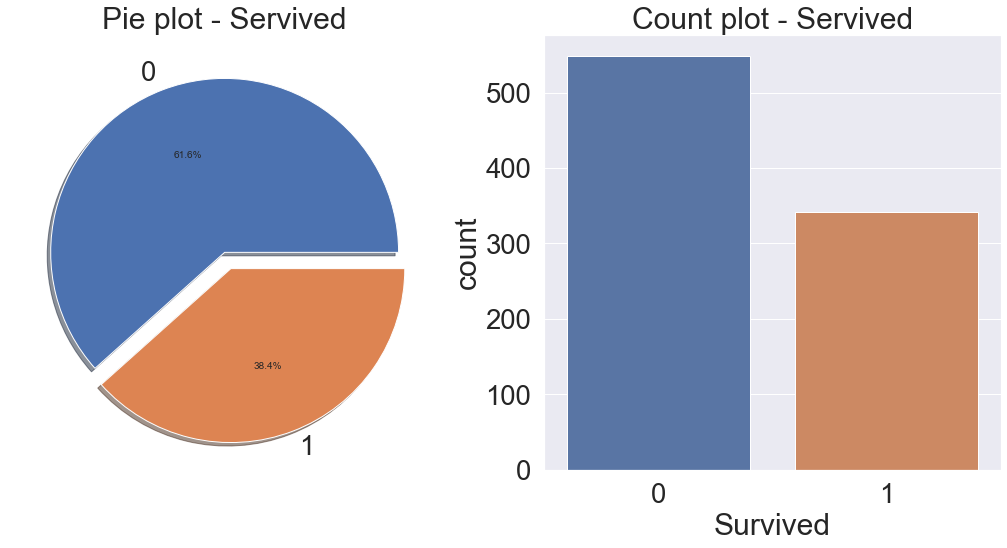

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Servived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Servived')

target label 의 분포가 균일 함 \
불균일의 경우, 예를 들어 100 중 1이 99개, 0이 1개라고 하면 \
모델이 모든것을 1이라고 결과를 내더라도 정확도가 99%가 된다

### 2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
------
데이터 안에 숨겨진 사실을 찾기 위해서는 적절한 시각화가 필요 \
시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있음

#### 2.1 Pclass

 * Pclass는 서수형 데이터 \
   즉, 카테고리이면서 순서가 있는 데이터 타입
 * 엑셀의 피벗 차트와 비슷한 작업 \
   pandas dataframe에서 groupby를 사용
   또는 pivot이라는 메소드도 존재
 * Pclass, Survived 를 가져온 후 pclass로 묶으면 \
   pclass 마다 0, 1이 count 되는데 이를 평균을 내면 pclass별 생존률 나옴
  

In [ ]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
# pclass 그룹 별 생존자수 합
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
# 이 작업을 crosstab으로 편하게 가능
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
# mean은 생존률을 구할 수 있음
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

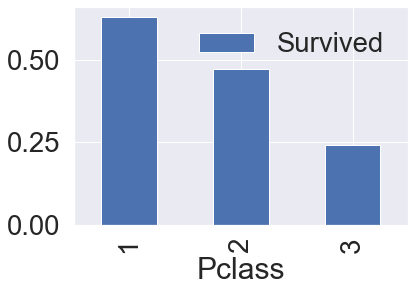

In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

이 데이터를 통해 Pclass가 생존에 큰 영향을 미친다고 생각할 수 있다

#### 2.2 Sex

Text(0.5, 1.0, 'Sex : Survived vs Dead')

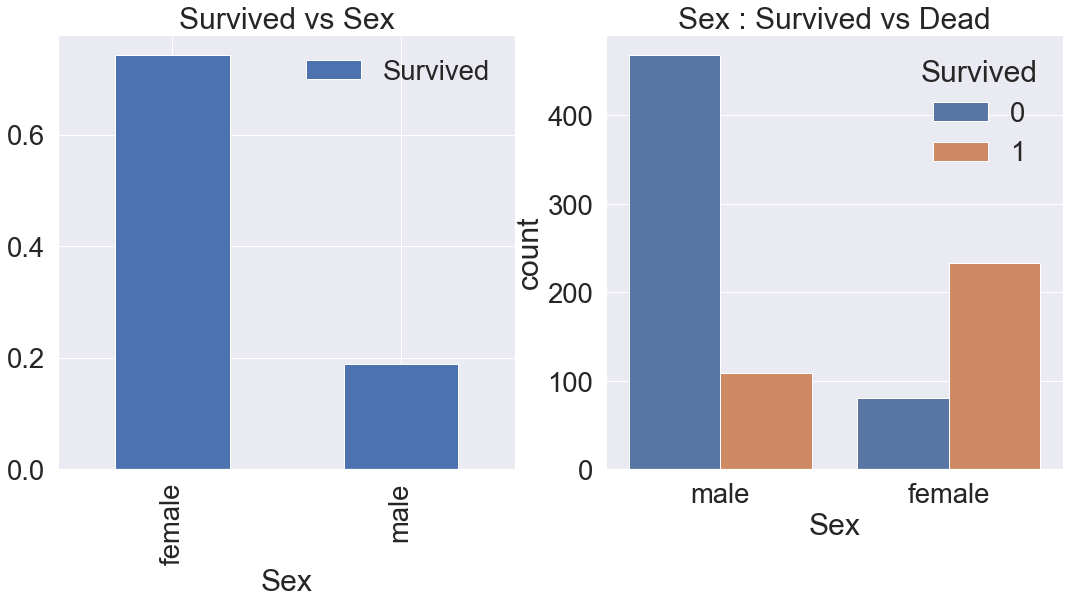

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

#### 2.3 Both Sex and Pclass

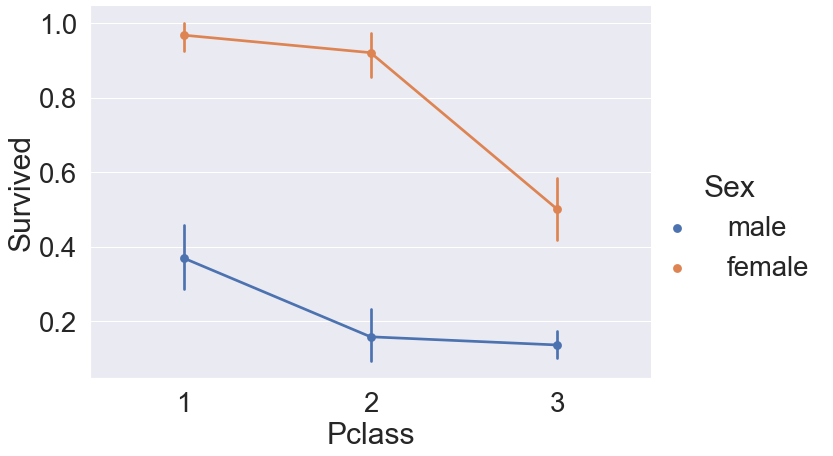

In [ ]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

모든 클래스에서 생존률이 male보다 female이 높다

#### 2.4 Age

In [ ]:
print('제일 나이 많은 승객 : {}'.format(df_train['Age'].max()))
print('제일 나이 어린 승객 : {:.1f}'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f}'.format(df_train['Age'].mean()))

제일 나이 많은 승객 : 80.0
제일 나이 어린 승객 : 0.4
탑승객 평균 나이 : 29.7


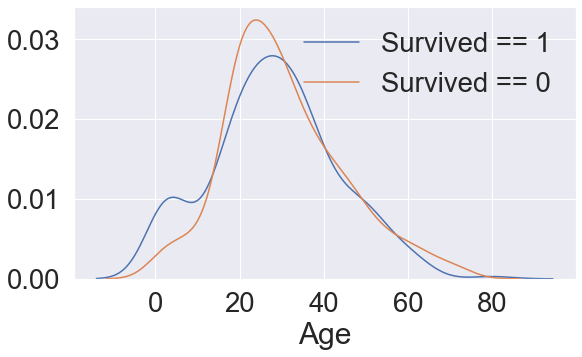

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.ylabel('')
plt.legend(['Survived == 1', 'Survived == 0'])

약 15세 미만에서 생존률이 상대적으로 높음을 확인 할 수 있다

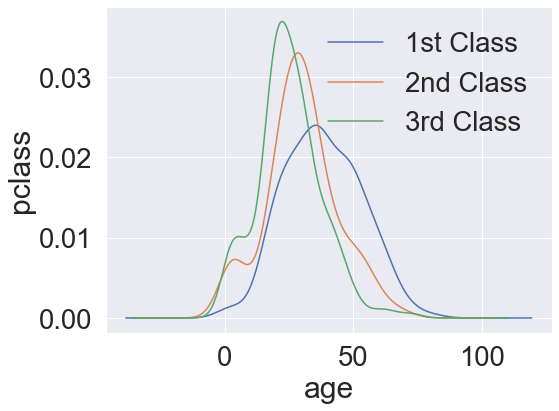

In [ ]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel('age')
plt.ylabel('pclass')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

클리스별 나이 분포

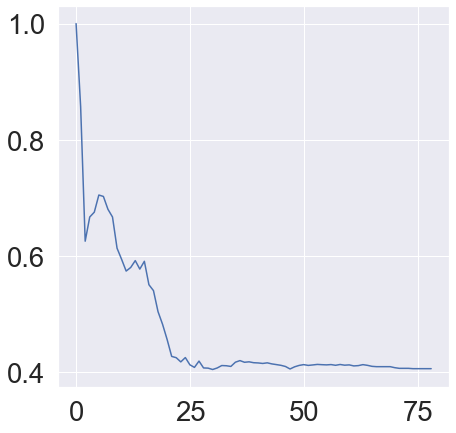

In [ ]:
cummulate_survived_ratio = []
for i in range(1, 80):
    cummulate_survived_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survived_ratio)

나이 별 생존률 누적확률

#### 2.5 Embarked

In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked'>

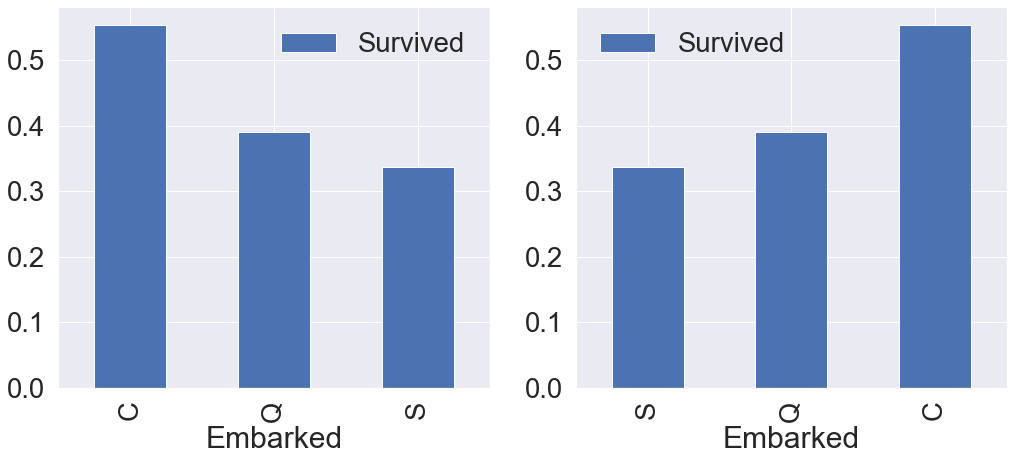

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(17,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar(ax=ax[1])
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(ax=ax[0])

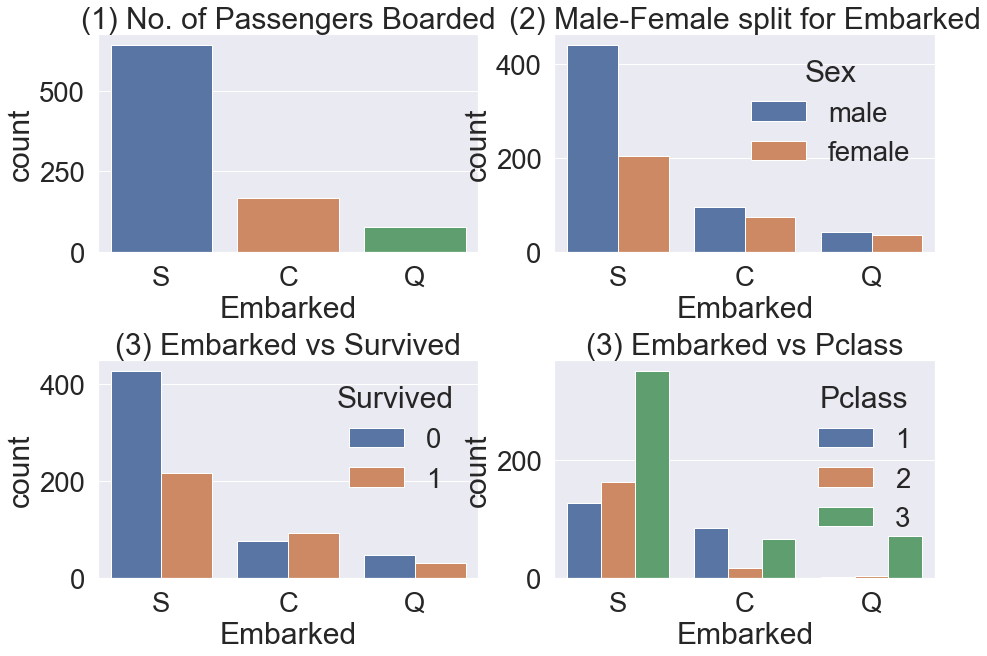

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(15,10))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(3) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

* Figure(1) - S에서 가장 많은 사람이 탑승
* Figure(2) - 전체적으로 남성이 많이 탔고 S에서 가장 많이 탐
* Figure(3) - C에서 탄 사람들이 생존률이 더 좋다
* Figure(4) - C에서 생존률이 더 좋은 이유는 1 Class에 탄 사람이 더 많기 때문 \
    S에서 탄 사람은 3 Class에 탄 사람이 더 많아서 생존률이 안좋게 나옴

### 2.6 Family - SibSp(형제자매) + Parch(부모,자녀)
 SibSp와 Parch를 합치면 함께 탑승한 가족의 수가 될것이다 \
 이 두 feature를 더해서 새로운 feature `FamilySize`를 만들자

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [ ]:
df_train['FamilySize'].max()

11

<AxesSubplot:xlabel='FamilySize'>

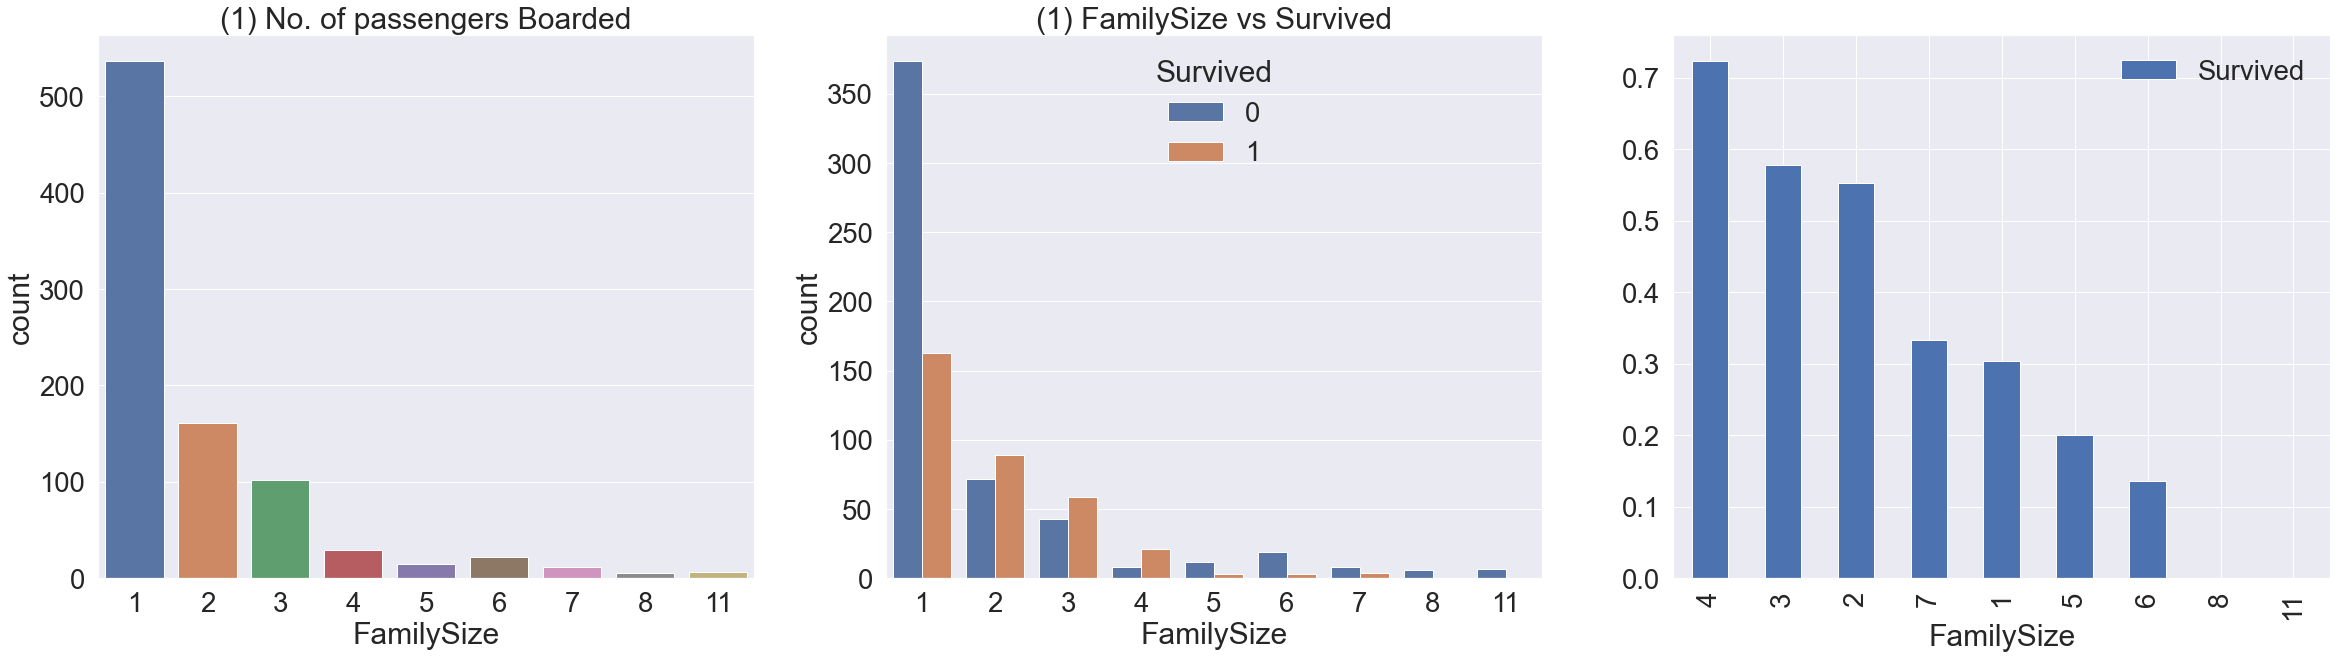

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of passengers Boarded')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(1) FamilySize vs Survived')

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])

### 2.7 Fare

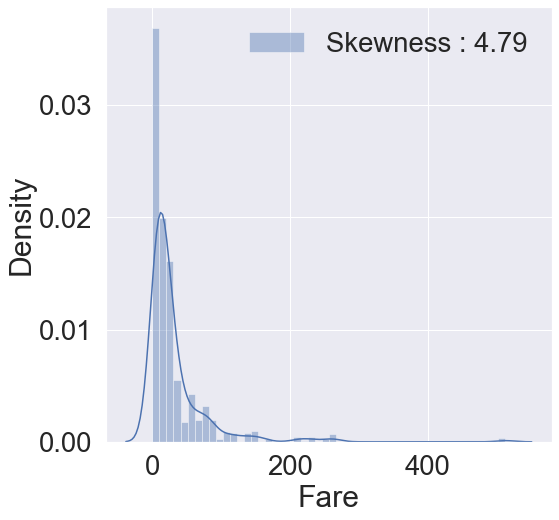

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train["Fare"], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [ ]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
#testset 에 있는 nan value 를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

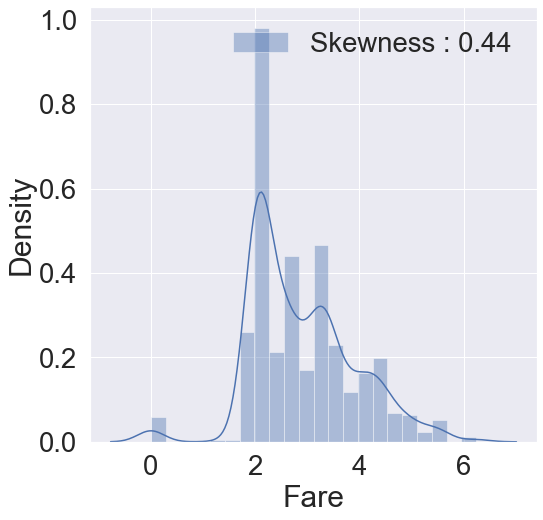

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

log를 취하니 비대칭성이 많이 사라진 것을 확인 할 수 있다 \
이러한 작업을 하여 모델이 좀 더 좋은 성능을 내도록 할 수 있다

### 2.8 Cabin
이 feature 은 NaN이 대략 80% 이므로 target 데이터에 미칠 중요한 정보 얻기가 어렵다 \
그래서 포함하지 않겠다!!!

### 2.9 Ticket

In [ ]:
df_train['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
3101295     6
347088      6
           ..
243880      1
315096      1
345767      1
2664        1
239854      1
Name: Ticket, Length: 681, dtype: int64

## 3. 특성 공학 (Feature Engineering)
------
null data 를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지 될수 있다 \
특히, Feature Engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로, \
**Train 뿐만 아니라 Test 도 똑같이 적용** 해주어야 한다


### 3.1 Fill Null
####  3.1.1 Fill Null in Age using title

In [ ]:
df_train['Age'].isnull().sum()

177

Age 에는 Null 데이터가 177개나 존재함

영어에는 Miss, Mrr, Mrs 같은 title이 존재

pandas series 에는 data 를 string 으로 바꿔주는 `str` method, \
거기에 정규표현식을 적용하게 해주는 `extract` method가 있다 \
이를 이용하여 title를 추출 가능

In [ ]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [ ]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

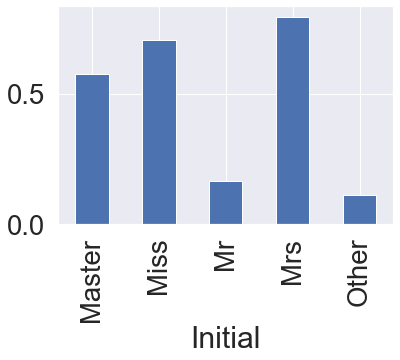

In [ ]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

Null 데이터를 채우는 방법은 많이 존재
statistics 를 활용하는 방법, denoising autoencoder 등등
 - denoising autoencoder : null data가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측하여 채워 넣는 방법

In [ ]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [ ]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

In [ ]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [ ]:
df_test.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       327
Embarked      0
dtype: int64

#### 3.1.2 Fill Null in Embarked

Embarked는 Null value 가 2개이고, S에서 가장 많은 탑승객이 있었으므로 간단하게 Null을 S로 채운다

dataframe 의 `fillna` method 를 이용하면 쉽게 채울수 있다
inplace=True 를 하게 되면 df_train 에 fillna 를 실제 적용

In [ ]:
df_train['Embarked'].fillna('S', inplace=True)

In [ ]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

## 3.2 Change Age(continuous to categorical)
Age 는 현재 continuous feature 이다. \
이대로 써도 모델을 세울수 있지만 Age를 몇개의 group 으로 나누어 category 화 시켜 줄 수 도 있다.

방법은 \
dataframe 의 indexing 방법인 loc 를 사용하여 직접 해줄 수 있고 \
아니면 apply 를 사용해 함수를 넣을 수 있다

In [ ]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [ ]:
df_train['Age_cat']

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: Age_cat, Length: 891, dtype: int64

## 3.3 Change Initial, Embarked and Sex (string to numerical)
현재 Initial 은 Mr, Miss, Master, Other 총 5개로 이루어져 있다 \
이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때 \
컴퓨터가 인식 할 수 있도록 수치화 시켜야 한다

`map` method 를 가지고 간단히 할 수 있다

In [ ]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [ ]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [ ]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

이제 각 feature 간 상관관계를 보려고한다\
두 변수간의 Pearson correlation 을 구하면 (-1, 1) 사이의 값을 얻을 수 있다

 * -1로 갈수록 음의 상관관계
 * 1로 갈수록 양의 상관관계
 * 0은 상관관계가 없음

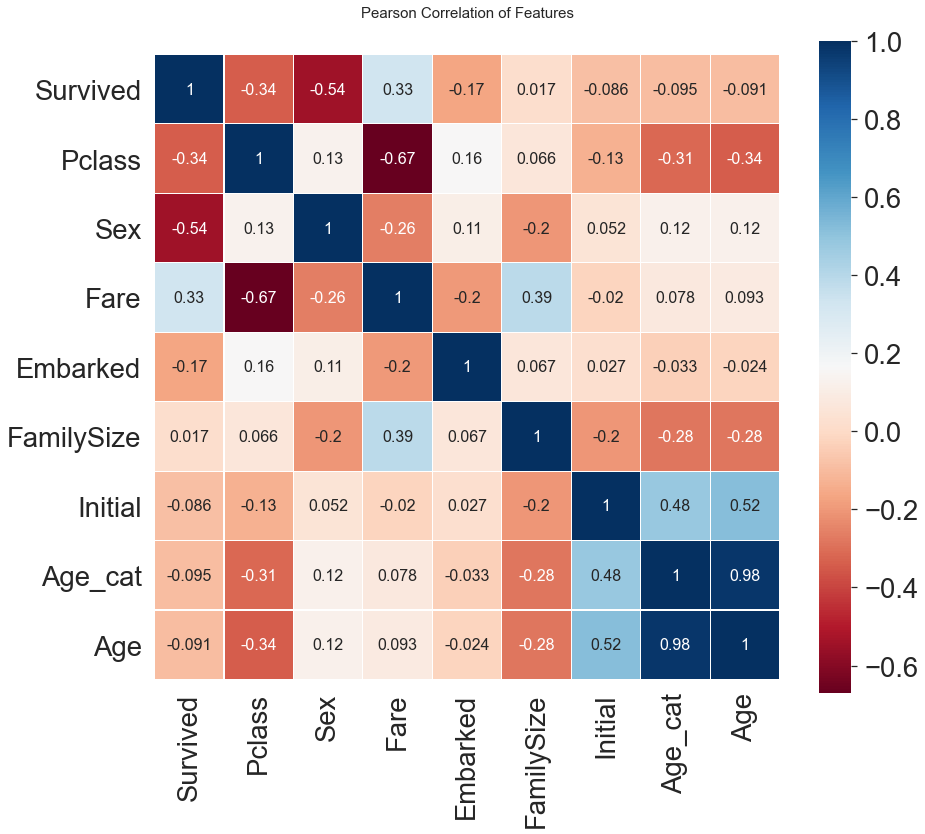

In [ ]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16})
del heatmap_data

EDA 에서 확인 했듯이, Sex 와 Pclass 가 Survived 에 상관관계가 어느정도 있음을 확인 \
생각보다 Fare 와 Embarked 도 상관관계가 있음을 볼수 있음

또, 서로 강한 상관관계를 가지는 feature 들이 없다\
이것은 모델을 학습 시킬 때, 불필요한 feature 가 없다는 것을 의미



### 3.4 One-hot encoding on Initial and Embarked
수치화 시킨 카테고리 데이터를 그대로 넣어도 되지만,\
모델의 성능을 높이기 위해 one-hot encoding 을 해줄 수 있다\
수치화는 간단히 Mater == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4로 매핑 해주는 것을 말함\
One-hot encoding 은 위 카테고리를 (0,1)로 이루어진 5차원의 벡터로 나타내는 것을 말함

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [ ]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,...,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,...,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,...,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,...,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,...,1,3,0,0,1,0,0,0,0,1


### 3.5 Drop columns

필요없는 feature 를 제거

In [ ]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


## 4. 모델 개발및 학습
-------

타이타닉 문제는 target class('Survived') 가 있으며 target class 는 0, 1 로 이루어져 있으므로\
**Binary Classification** 문제

지금 가지고 있는 train set 의 survived 를 제외한 input 을 가지고 모델을 최적화 시켜서\
각 샘플의 생존유무를 판단하는 모델을 만들어 낸다\
그 후에 모델이 학습하지 않았던 test set 을 input 으로 주어서 test set 의 각 샘플의 생존 유무를\
예측한다

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #모델의 평가를 위해
from sklearn.model_selection import train_test_split # trainng set 를 쉽게 나눠주는 함수

### 4.1 Prepartion - Split dataset into train, valid(dev), test set

In [ ]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [ ]:
X_train.shape, X_test.shape

((891, 14), (418, 14))

과적합 등의 문제를 피하기 위해 valid set을 따로 만들어 모델 평가를 한다

train_test_split 을 사용하여 쉽게 train set 에서 train 과 validation 을 분리 가능

In [ ]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

In [ ]:
y_tr.shape, y_vld.shape

((712,), (179,))

### 4.2 Model generation and prediction

In [ ]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [ ]:
print("{:.2f}".format(100 * metrics.accuracy_score(prediction, y_vld)))

81.56


79% 의 정확도가 나왔다

학습된 모델은 feature importance 를 가지게 되는데\
이것을 확인하여 지금 만든 모델이 어떤 feature 에 영향을 많이 받았는지 확인 가능

In [ ]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

<AxesSubplot:>

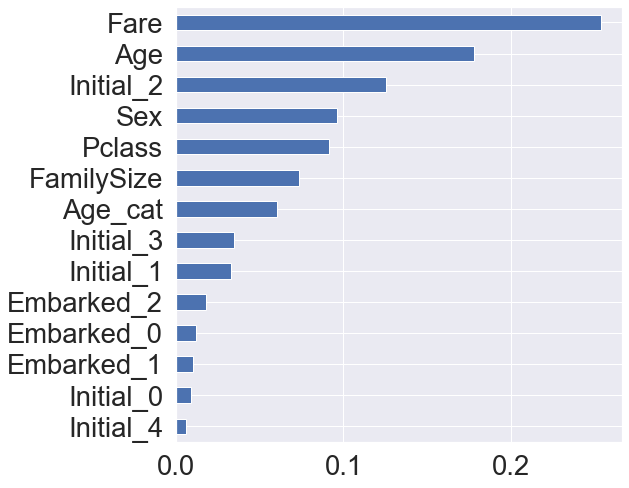

In [ ]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()

### 4.3 keras를 사용한 NN 모델

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(32, activation='relu', input_shape=(14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, activation='relu'))

Loss = 'binary_crossentropy'
nn_model.compile(loss=Loss, optimizer=Adam(), metrics=['accuracy'])
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                480       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
history = nn_model.fit(X_tr, y_tr,
                      batch_size=64,
                      epochs=500,
                      validation_data=(X_vld, y_vld),
                      verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 17ms/step - loss: 8.8462 - accuracy: 0.3933 - val_loss: 9.5814 - val_accuracy: 0.3520
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 9.0674 - accuracy: 0.3764 - val_loss: 9.6545 - val_accuracy: 0.3520
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 9.0981 - accuracy: 0.3834 - val_loss: 9.6741 - val_accuracy: 0.3520
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 9.1229 - accuracy: 0.3820 - val_loss: 9.7992 - val_accuracy: 0.3575
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 9.1493 - accuracy: 0.3890 - val_loss: 9.8002 - val_accuracy: 0.3575
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 9.1496 - accuracy: 0.3876 - val_loss: 9.8036 - val_accuracy: 0.3575
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 9.0618 - accuracy: 0.3904 - val_loss: 9.6602 - val_accuracy: 0.3520
Epoch 8/500


In [ ]:
hists = [history]
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.393258,8.846170,0.351955,9.581409
1,0.376404,9.067358,0.351955,9.654454
2,0.383427,9.098148,0.351955,9.674149
3,0.382022,9.122882,0.357542,9.799243
4,0.389045,9.149263,0.357542,9.800225
...,...,...,...,...
495,0.730337,3.653399,0.748603,3.364360
496,0.741573,3.433872,0.765363,3.348202
497,0.735955,3.453031,0.770950,3.152786
498,0.734551,3.485231,0.782123,3.140545


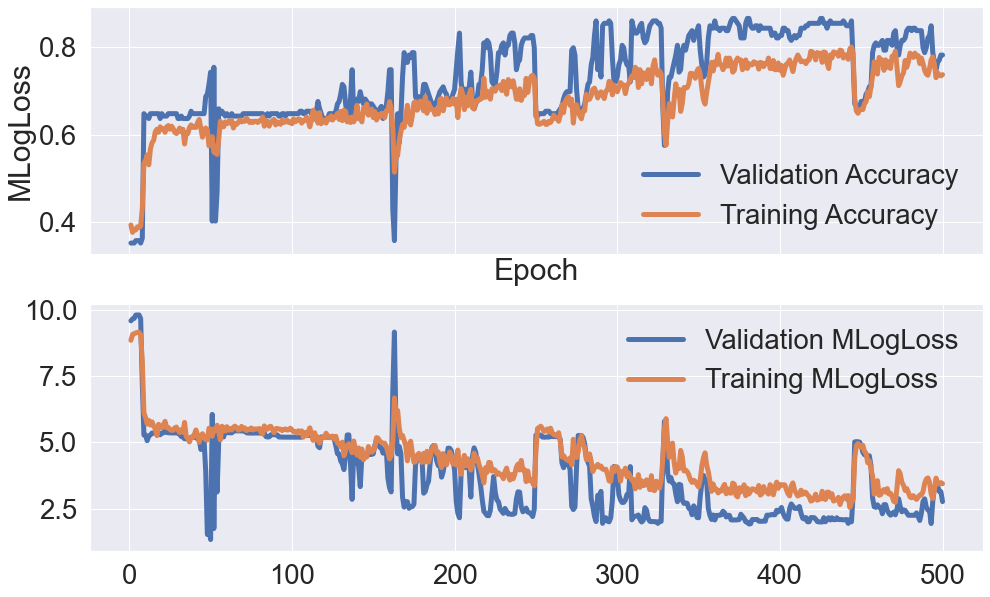

In [ ]:
hists = [history]
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df.index = np.arange(1, len(hist_df) + 1)
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16,10))
axs[0].plot(hist_df.val_accuracy, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.accuracy, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)
axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss')
axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
axs[0].set_ylabel('MLogLoss')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[1].legend(loc=0)

## 5. 모델 예측 및 평가
------

In [ ]:
submission = pd.read_csv('./dataset/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
prediction = nn_model.predict(X_test)
prediction = prediction > 0.5
prediction = prediction.astype(np.int)
prediction = prediction.T[0]

In [ ]:
submission['Survived'] = prediction
submission.to_csv('my_nn_submission.csv', index=False)